In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import scipy 
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
pandas_profiling.ProfileReport(df)

C:\Users\Madhavan\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,1067
Total Missing (%),0.0%
Total size in memory,108.5 KiB
Average record size in memory,104.1 B
Numeric,4
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [19]:
data=sm.datasets.get_rdataset("Guerry","HistData").data
data

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
dept               86 non-null int64
Region             85 non-null object
Department         86 non-null object
Crime_pers         86 non-null int64
Crime_prop         86 non-null int64
Literacy           86 non-null int64
Donations          86 non-null int64
Infants            86 non-null int64
Suicides           86 non-null int64
MainCity           86 non-null object
Wealth             86 non-null int64
Commerce           86 non-null int64
Clergy             86 non-null int64
Crime_parents      86 non-null int64
Infanticide        86 non-null int64
Donation_clergy    86 non-null int64
Lottery            86 non-null int64
Desertion          86 non-null int64
Instruction        86 non-null int64
Prostitutes        86 non-null int64
Distance           86 non-null float64
Area               86 non-null int64
Pop1831            86 non-null float64
dtypes: float64(2), int64(18), object(3

In [21]:
data.columns

Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

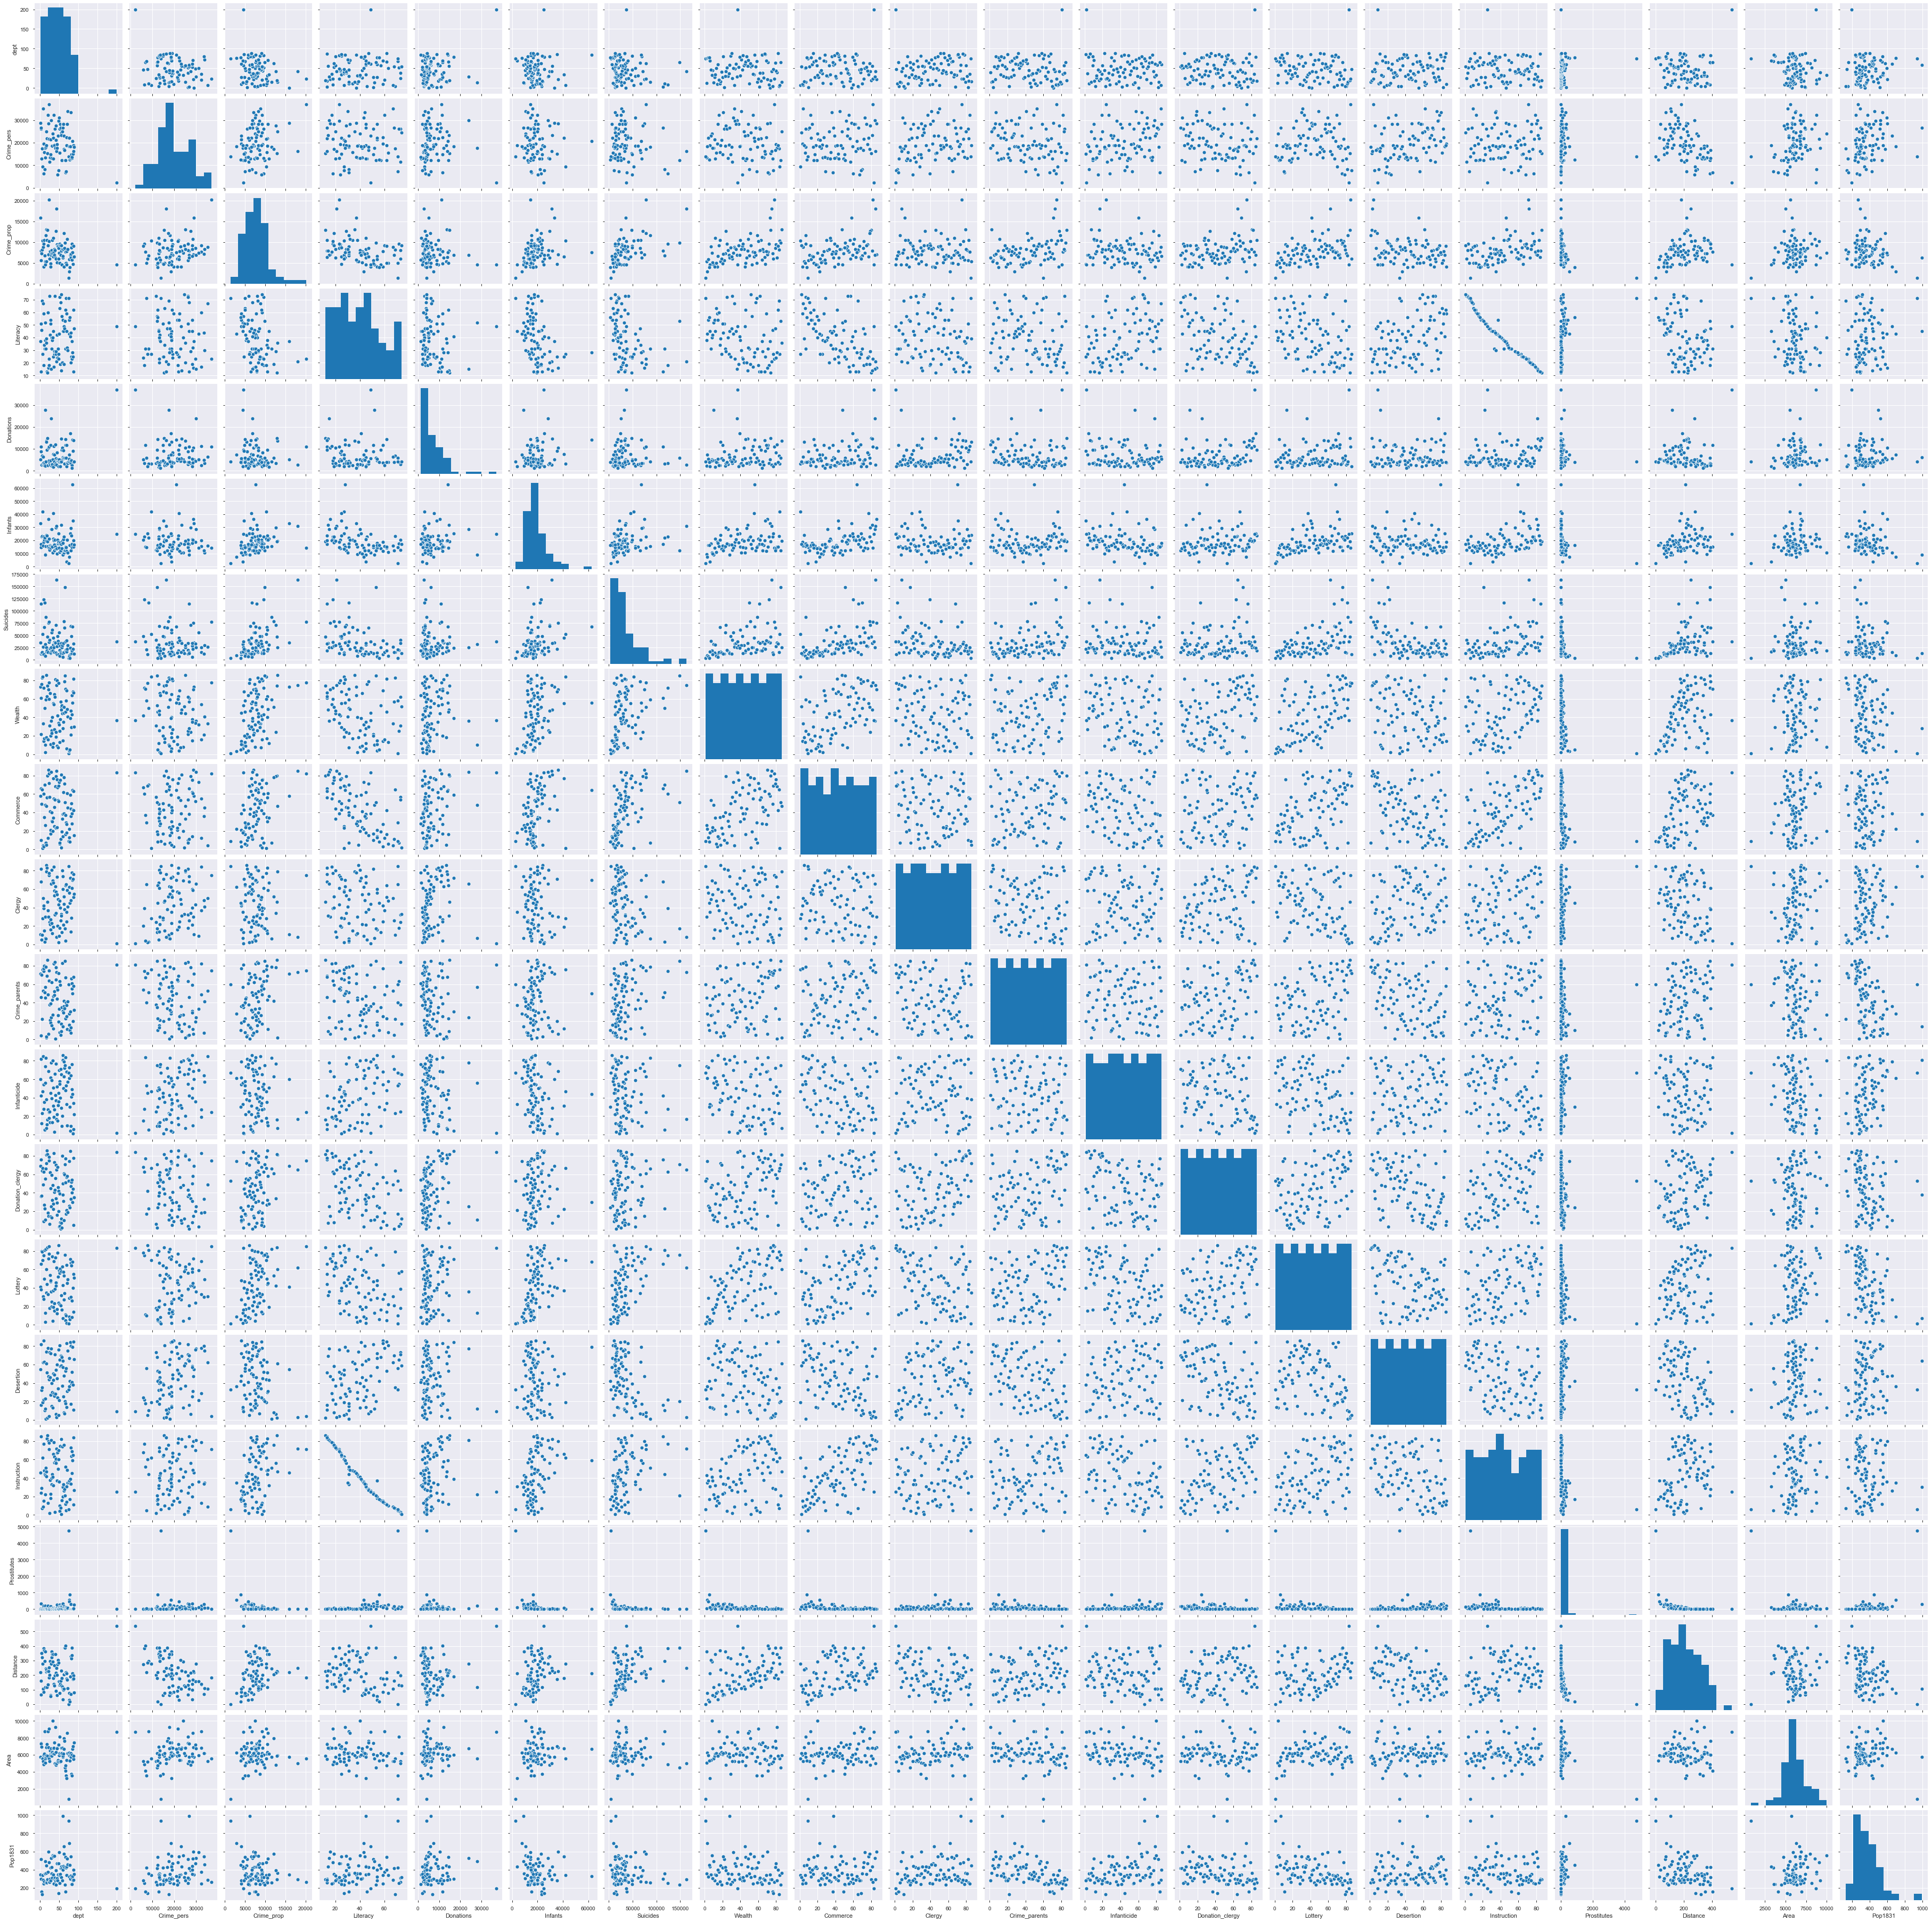

In [25]:
sns.pairplot(data)

In [26]:
data.isna().sum()

dept               0
Region             1
Department         0
Crime_pers         0
Crime_prop         0
Literacy           0
Donations          0
Infants            0
Suicides           0
MainCity           0
Wealth             0
Commerce           0
Clergy             0
Crime_parents      0
Infanticide        0
Donation_clergy    0
Lottery            0
Desertion          0
Instruction        0
Prostitutes        0
Distance           0
Area               0
Pop1831            0
dtype: int64

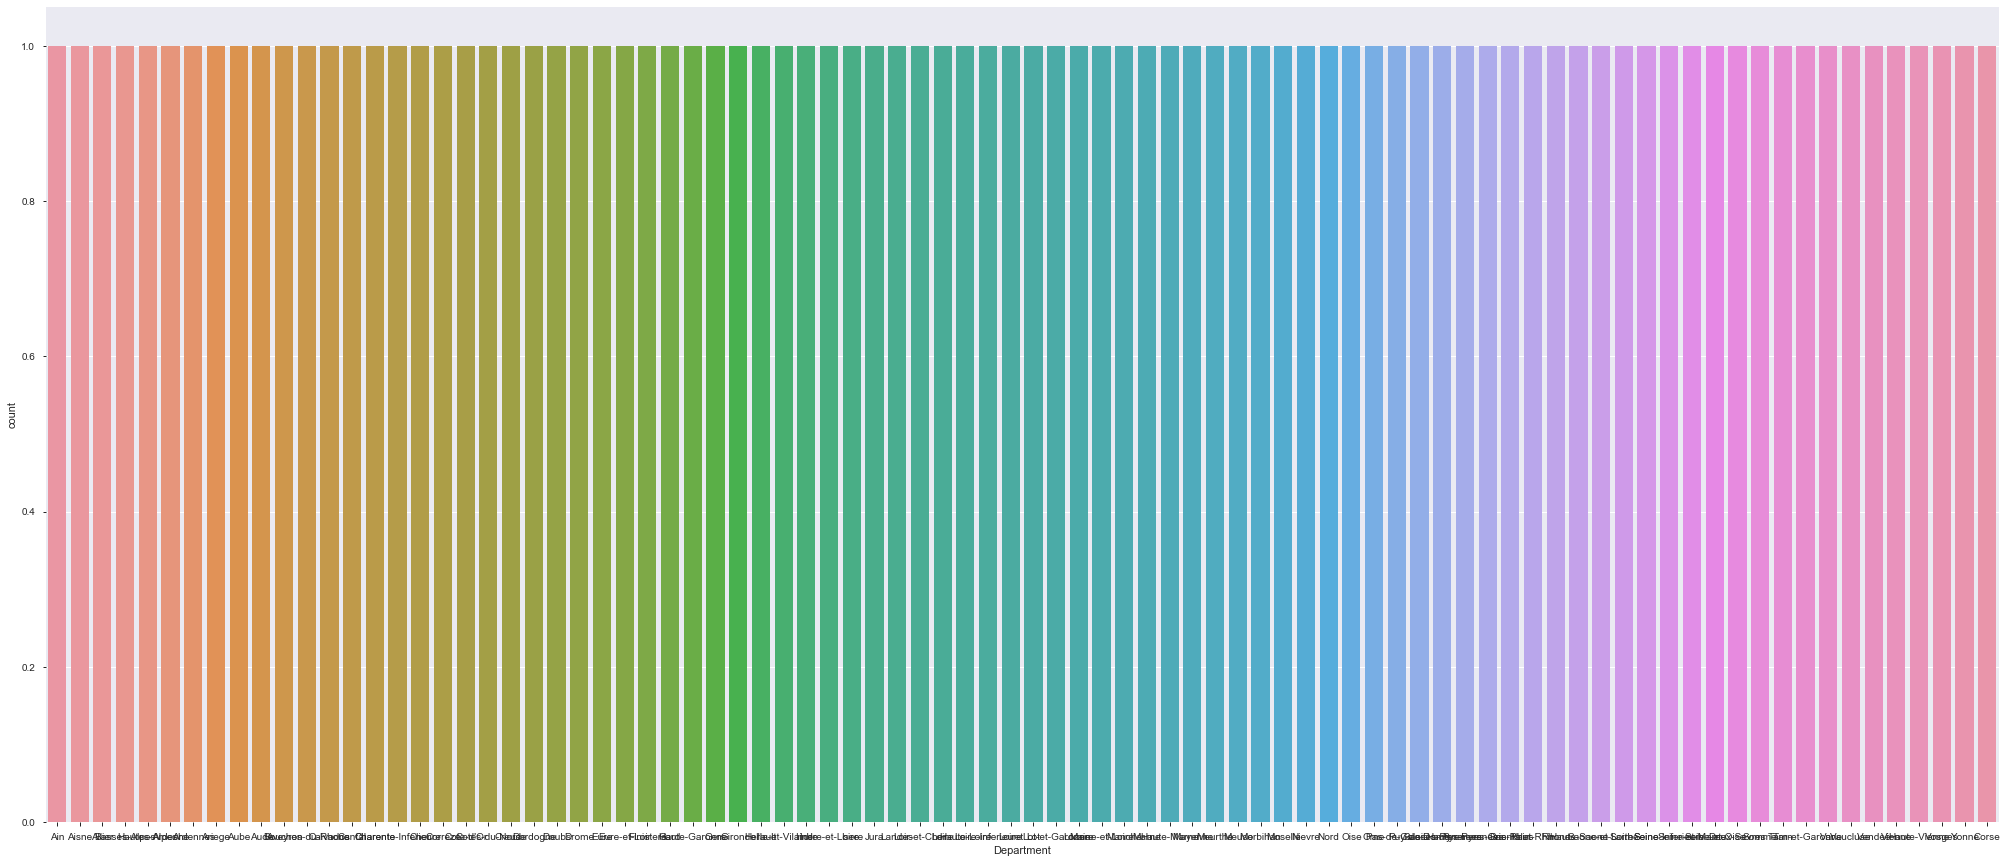

In [27]:
plt.figure(figsize=(35,15))
sns.countplot(data.Department)

In [30]:
df=data.dropna()

In [32]:
import statsmodels.formula.api as smf
result=smf.ols('Lottery ~ Literacy + np.log(Pop1831)',data=df).fit()

In [33]:
result

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     21.30
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.54e-08
Time:                        19:00:46   Log-Likelihood:                -375.04
No. Observations:                  85   AIC:                             756.1
Df Residuals:                      82   BIC:                             763.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         238.3807     35.636      6.689      0.000     167.490     309.272
Literacy           -0.5008      0.127     -3.931      0.000      -0.754      -0.247
np.log(Pop1831)   -29.9132      6.050     -4.945      0.000     -41.948     -17.879
==============================================================================
Omnibus:                        3.233   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.993
Skew:                          -0.459   Prob(JB):                        0.224
Kurtosis:                       2.940   Cond. No.                         708.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.326   
Dependent Variable:  Lottery          AIC:                756.0854
Date:                2020-04-06 19:00 BIC:                763.4133
No. Observations:    85               Log-Likelihood:     -375.04 
Df Model:            2                F-statistic:        21.30   
Df Residuals:        82               Prob (F-statistic): 3.54e-08
R-squared:           0.342            Scale:              412.65  
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
Intercept       238.3807  35.6359  6.6893 0.0000 167.4895 309.2718
Literacy         -0.5008   0.1274 -3.9307 0.0002  -0.7542  -0.2473
np.log(Pop1831) -29.9132   6.0496 -4.9447 0.0000 -41.9477 -17.8787
------------------------------------------------------------------
Omnibus:              3.233         Durbin-Watson:           2.052
Prob(Omnibus):        0.199         Jarque-Bera (JB):        2.993
Skew:                 -0.459        Prob(JB):                0.224
Kurtosis:             2.940         Condition No.:           708  
==================================================================

"""